In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 40.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving finish.jpg to finish.jpg


In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving s_finish.jpg to s_finish (1).jpg


finish.jpg


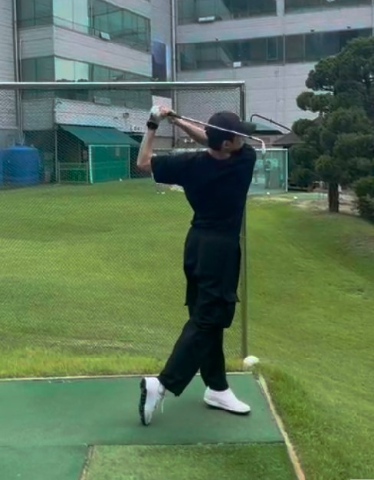

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

s_finish.jpg


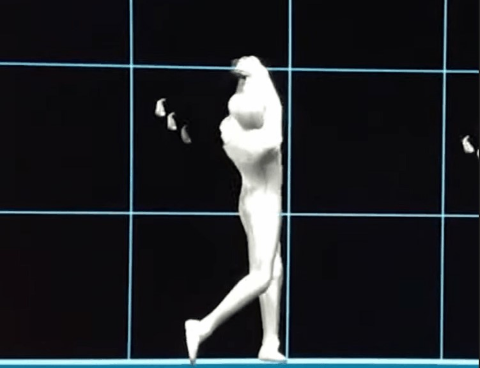

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images1 = {name: cv2.imread(name) for name in uploaded1.keys()}
# Preview the images.
for name, image in images1.items():
  print(name)   
  resize_and_show(image)

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Nose coordinates: (302.7867360115051, 188.23804333806038)
L_elbow coordinates: (194.42967557907104, 212.0070904493332)
R_elbow coordinates: (270.4130344390869, 184.79477614164352)
L_hip coordinates: (268.69631576538086, 330.5615857243538)
R_hip coordinates: (285.9234218597412, 332.6405957341194)
L_foot_index coordinates: (315.08137369155884, 528.5059288144112)
R_foot_index coordinates: (196.09682989120483, 540.4246971011162)
Pose landmarks of finish.jpg:


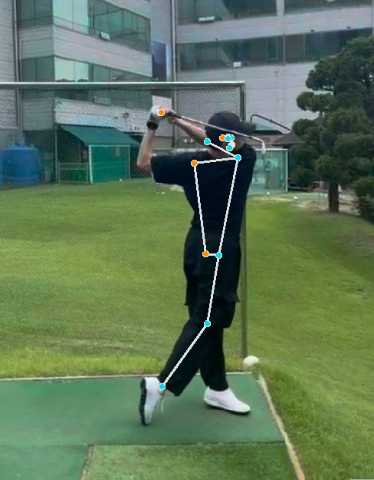

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )
    print(
      f'L_elbow coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_hight})'
    )
    print(
      f'R_elbow coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_hight})'
    )
    print(
      f'L_hip coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight})'
    )
    print(
      f'R_hip coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight})'
    )
    print(
      f'L_foot_index coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight})'
    )
    print(
      f'R_foot_index coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

In [ ]:
import math

def get_num():
  x1 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
  y1 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight
  x2 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width
  y2 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight
  return [x1, y1, x2, y2]

def cal_rad(arr):
  rad = math.atan2(arr[3]-arr[1],arr[2]-arr[0])
  return rad

def radTodeg(rad):
  PI = math.pi
  deg = (rad*180)/PI
  print("{0:0.2f}".format(deg))

arr = get_num()
rad = cal_rad(arr)
radTodeg(rad)

81.53


Nose coordinates: (404.9626170396805, 172.10685539245605)
L_elbow coordinates: (405.06973510980606, 206.34490585327148)
R_elbow coordinates: (430.88151943683624, 185.6418228149414)
L_hip coordinates: (415.4258098602295, 325.75393295288086)
R_hip coordinates: (412.1218015551567, 325.4759101867676)
L_foot_index coordinates: (441.52161598205566, 561.0111122131348)
R_foot_index coordinates: (306.5024220049381, 563.7703971862793)
Pose landmarks of s_finish.jpg:


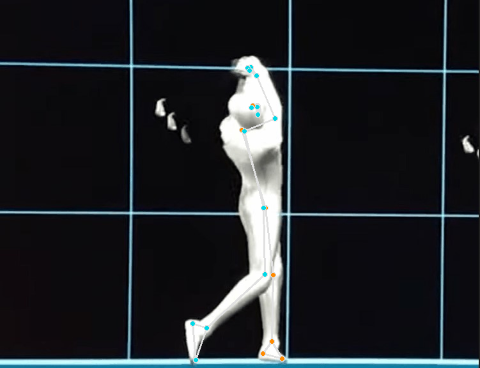

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images1.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )
    print(
      f'L_elbow coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_hight})'
    )
    print(
      f'R_elbow coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_hight})'
    )
    print(
      f'L_hip coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight})'
    )
    print(
      f'R_hip coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight})'
    )
    print(
      f'L_foot_index coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight})'
    )
    print(
      f'R_foot_index coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

In [ ]:
import math

def get_num():
  x1 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
  y1 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight
  x2 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width
  y2 = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight
  return [x1, y1, x2, y2]

def cal_rad(arr):
  rad = math.atan2(arr[3]-arr[1],arr[2]-arr[0])
  return rad

def radTodeg(rad):
  PI = math.pi
  deg = (rad*180)/PI
  print("{0:0.2f}".format(deg))

arr = get_num()
rad = cal_rad(arr)
radTodeg(rad)

82.89


Nose world landmark:
x: -0.04479788988828659
y: -0.2824224829673767
z: -0.5942217111587524
visibility: 0.9994083642959595



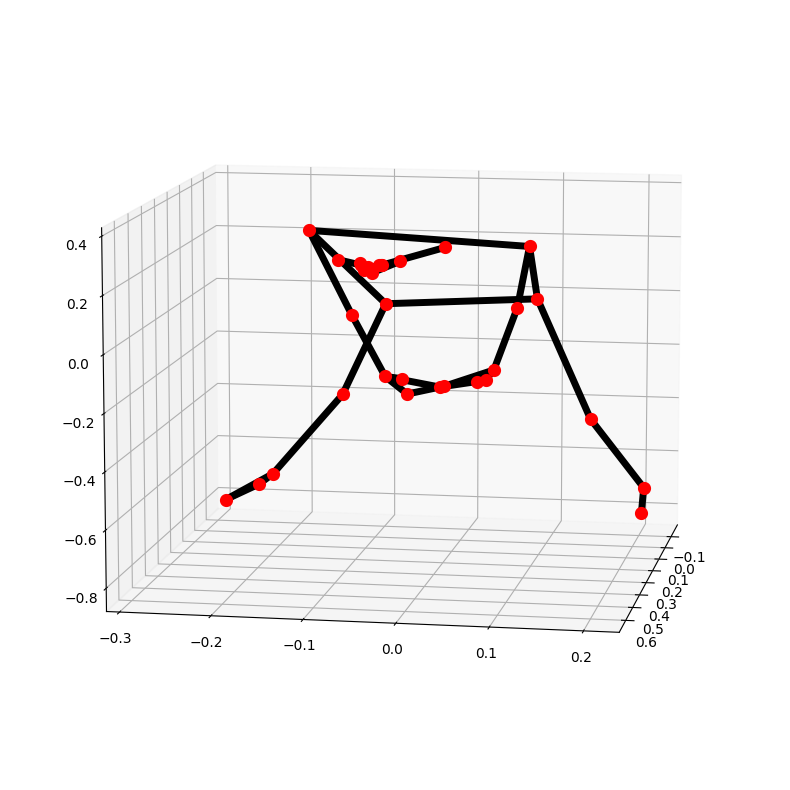

In [ ]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

Nose world landmark:
x: -0.020184718072414398
y: -0.4048428237438202
z: -0.6083458662033081
visibility: 0.9997078776359558



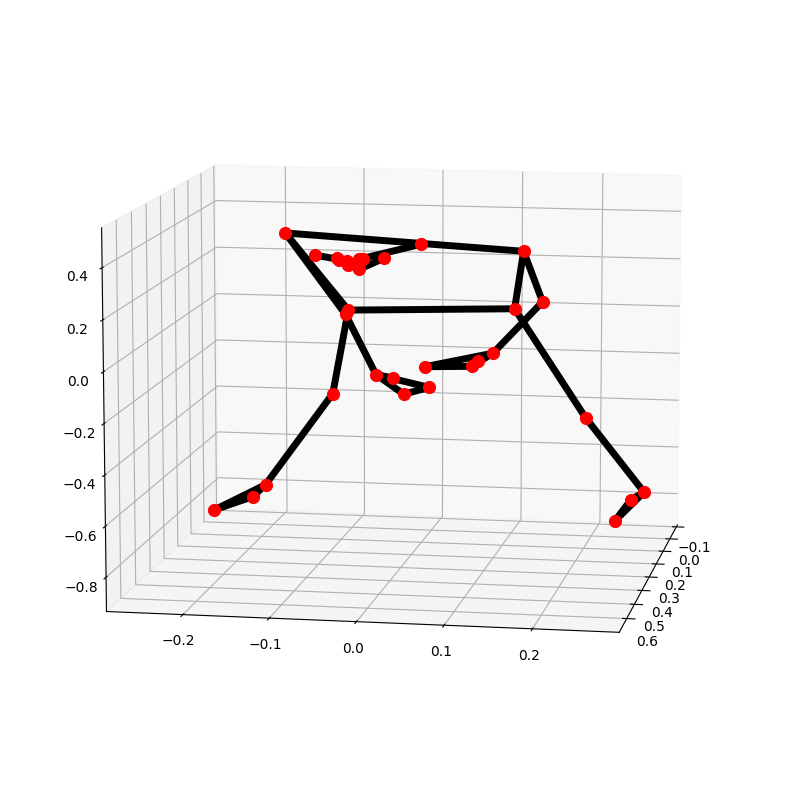

In [ ]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images1.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

Pose segmentation of finish.jpg:


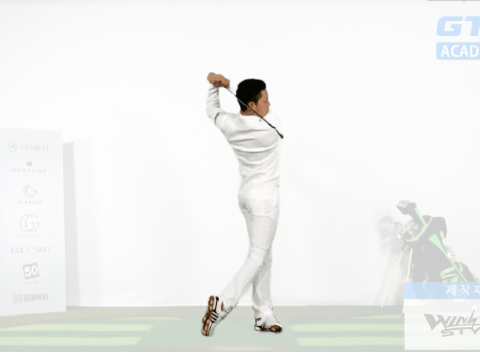

In [ ]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)

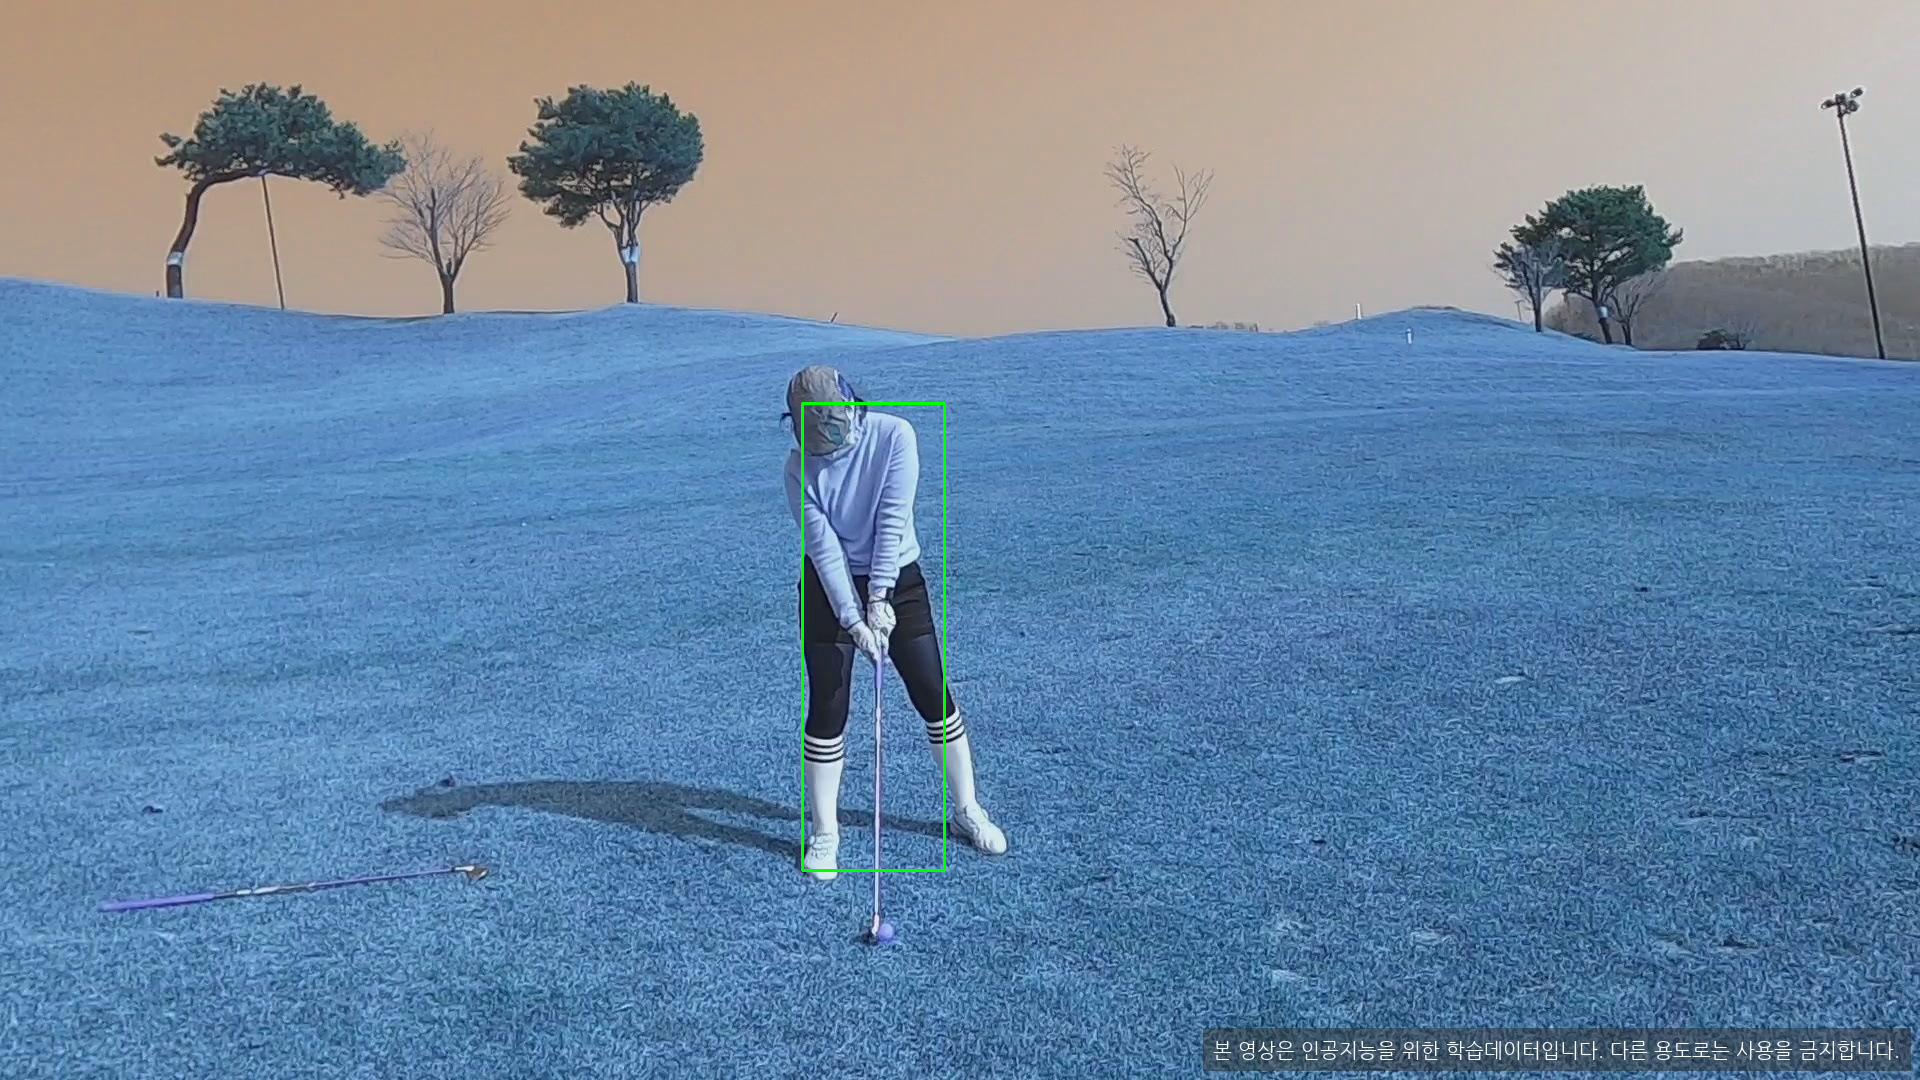

In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/Multi_Classification_Sample_Images/mediapipe_test2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pose_detector = mp.solutions.pose.Pose()

results = pose_detector.process(img)

if results.pose_landmarks is not None:
    x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
    for landmark in results.pose_landmarks.landmark:
        x, y = int(landmark.x * img.shape[1]), int(landmark.y * img.shape[0])
        if x < x_min:
            x_min = x
        if y < y_min:
            y_min = y
        if x > x_max:
            x_max = x
        if y > y_max:
            y_max = y
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

cv2_imshow(img)

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# For static images:
IMAGE_FILES = []
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()